<a href="https://colab.research.google.com/github/gohibi/eli/blob/eli/labo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
data = {'X':[1 ,1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 ],
        'Y':[4, 6, 6.8, 7.9, 8.7, 9, 9.5]}
meta=pd.DataFrame(data)

In [17]:
meta

,X,Y
0,1.0,4.0
1,1.5,6.0
2,2.5,6.8
3,3.5,7.9
4,4.5,8.7
5,5.5,9.0
6,6.5,9.5


**Cредние точки:**

In [18]:
point={'y=a*x^b':[np.sqrt(data['X'][0]*data['X'][-1]) ,np.sqrt(data['Y'][0]*data['Y'][-1]) ],
       'y=a*b^x':[(data['X'][0]+data['X'][-1])/2,np.sqrt(data['Y'][0]*data['Y'][-1])],
       'y=1/(a+b*x)':[(data['X'][0]+data['X'][-1])/2,(2*data['Y'][0]*data['Y'][-1])/(data['Y'][0]+data['Y'][-1]) ],
       'y=a+b*lg(x)':[np.sqrt(data['X'][0]*data['X'][-1]) , (data['Y'][0]+data['Y'][-1])/2],
       'y=a+b/x':[(2*data['X'][0]*data['X'][-1])/(data['X'][0]+data['X'][-1]) ,(data['Y'][0]+data['Y'][-1])/2 ],
       'y=ax/(b+x)':[(2*data['X'][0]*data['X'][-1])/(data['X'][0]+data['X'][-1]),(2*data['Y'][0]*data['Y'][-1])/(data['Y'][0]+data['Y'][-1])]}

In [19]:
point

{'y=1/(a+b*x)': [3.75, 5.62962962962963],
 'y=a*b^x': [3.75, 6.164414002968976],
 'y=a*x^b': [2.5495097567963922, 6.164414002968976],
 'y=a+b*lg(x)': [2.5495097567963922, 6.75],
 'y=a+b/x': [1.7333333333333334, 6.75],
 'y=ax/(b+x)': [1.7333333333333334, 5.62962962962963]}

In [20]:
d= {"x":[], "y":[], "label":[]}
for label, coord in point.items():
    d["x"].append(coord[0])
    d["y"].append(coord[1])
    d["label"].append(label)

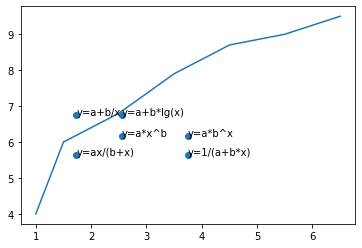

In [21]:
plt.subplot()
plt.plot(meta['X'],meta['Y'])
plt.scatter(d["x"], d["y"], marker = 'o')
for label, x, y in zip(d["label"], d["x"], d["y"]):
    plt.annotate(label, xy = (x, y))

**2.	Вычислить числовые характеристики   **

In [22]:
xsr=meta['X'].mean()
ysr=meta['Y'].mean()
sx=meta['X'].std()
sy=meta['Y'].std()
n=len(meta)
r=meta['X'].corr(meta['Y'])
#Коэффициент корреляции.

In [23]:
print(" xsr = %0.3f \n"% xsr)
print(" ysr = %0.3f  \n"%ysr)
print(" sx = %0.3f  \n"%sx)
print(" sy = %0.3f  \n"%sy)
print(" n = %0.0f  \n"%n)
print(" r = %0.3f \n"%r)

 xsr = 3.571 

 ysr = 7.414  

 sx = 2.050  

 sy = 1.949  

 n = 7  

 r = 0.947 



In [24]:
import math
#y=a+b*lg(x)
lg_xi= [math.log10(meta.loc[x,'X']) for x in range(len(meta))]
yi = [meta.loc[x,'Y'] for x in range (len(meta))]
lg_xi_2= [(math.log10(meta.loc[x,'X']))**2 for x in range(len(meta))]
lg_xi_yi =  [math.log10(meta.loc[x,'X'])*meta.loc[x,'Y']  for x in range(len(meta))]

In [27]:
print(" sum lg_xi = %0.3f \n"% sum(lg_xi))
print(" sum yi = %0.3f  \n"%sum(yi))
print(" sum lg_xi_2 = %0.3f  \n"%sum(lg_xi_2))
print(" sum lg_xi_yi = %0.3f  \n"%sum(lg_xi_yi))

 sum lg_xi = 3.325 

 sum yi = 51.900  

 sum lg_xi_2 = 2.121  

 sum lg_xi_yi = 28.130  



Уравнения:


n * a + b * sum (lg(xi)) = sum(yi)


a * sum(lg(xi)) + b sum((lg(xi))^2) = sum(lg(xi)*yi)

**3.	Найти эмпирическое уравнение регрессий Y на Х.**

In [25]:

print(f"{n} * a + b * {sum(lg_xi)} = {sum(yi)} \n")
print(f"a * {sum(lg_xi)} + b * {sum(lg_xi_2)} = {sum(lg_xi_yi)}")

7 * a + b * 3.324587871990438 = 51.900000000000006 

a * 3.324587871990438 + b * 2.121026044457058 = 28.129567127071933


In [31]:
i=sum(lg_xi)
t=sum(lg_xi_2)
u=sum(yi)
e=sum(lg_xi_yi)
a = np.array([[n,i],[i,t]])
c=np.array([u,e])
x = np.linalg.solve(a, c)

In [ ]:
x

array([4.36455112, 6.42049388])

In [32]:
a=x[0].round(3)
b=x[-1].round(3)

print(f"y= {a} + {b} * log(x)")

y= 4.365 + 6.42 * log(x)


In [42]:
import pandas as pd

#y=a+b*lg(x),
data={'X':[ meta.loc[x,'X'] for x in range (len(meta))] , 
      'Y':[meta.loc[x,'Y'] for x in range (len(meta))],
    'f':[ a + b * math.log10(meta.loc[i,'X']) for i in range(len(meta))]}
df=pd.DataFrame(data)


In [43]:
df

,X,Y,f
0,1.0,4.0,4.365000
1,1.5,6.0,5.495506
2,2.5,6.8,6.919775
3,3.5,7.9,7.857917
4,4.5,8.7,8.558624
5,5.5,9.0,9.118128
6,6.5,9.5,9.583904


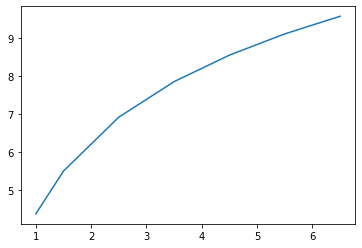

In [ ]:
plt.subplot()
plt.plot(df['X'],df['f'])

In [ ]:
SCR = sum((df['Y'].values-df['f'].values)**2)
SCT = sum((df['Y'].values-ysr)**2)

In [ ]:
R_2=round((1-(SCR/SCT)),6)
print(f'коэффициент детерминации R2 = {R_2} \n')
print('Значение R2 должно находиться в диапазоне от нуля до единицы: 0 ≤ R2 ≤ 1 \n')
print('Модель считается более качественной, если значение коэффициента детерминации близко к 1 \n')
print('R² приближается к 1, облако точек сужается вокруг линии регрессии и зависимость сильная.')

коэффициент детерминации R2 = 0.98048 

Значение R2 должно находиться в диапазоне от нуля до единицы: 0 ≤ R2 ≤ 1 

Модель считается более качественной, если значение коэффициента детерминации близко к 1 

R² приближается к 1, облако точек сужается вокруг линии регрессии и зависимость сильная.


**Проверить адекватность уравнения регрессии Y на X.**

In [ ]:
import scipy.stats
#y= 4.365 + 6.42 * log(x)
Fвыб = (R_2*(n-2)/(1-R_2)).round(6)
Fкр = scipy.stats.f.isf(0.05, 1, n-2).round(6)


In [ ]:
Fвыб

251.147541

In [ ]:
Fкр

6.607891

In [ ]:
print(f'{Fвыб} > {Fкр} ')
print(f'делаем вывод о том, что полученное уравнение линейной регрессии y= 4.365 + 6.42 * log(x) статистически значимо описывает результаты эксперимента.')

251.147541 > 6.607891 
делаем вывод о том, что полученное уравнение линейной регрессии y= 4.365 + 6.42 * log(x) статистически значимо описывает результаты эксперимента.


In [45]:
var_vip = df['f'].var()

var_fact = df['Y'].var()

hepta = np.sqrt(var_vip/var_fact)


In [48]:
print("var_vip = %0.3f"%var_vip)
print("var_fact = %0.3f"%var_fact)
print("hepta = %0.3f"%hepta)

var_vip = 3.724
var_fact = 3.798
hepta = 0.990
